<a href="https://colab.research.google.com/github/oltrovato25/Python-Class-Trovato/blob/main/Trovato_Copy_of_EfficientFrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [2]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [19]:
tickers_np

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP',
       'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS',
       'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET',
       'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
       'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH',
       'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO',
       'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR',
       'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE',
       'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR',
       'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG',
       'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', '

In [3]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN','LLY','SPY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,122.357414,43.422443,79.273956,71.589798,195.263580,123.702309,300.291534
2020-01-03 00:00:00-05:00,121.303787,43.040668,78.307510,70.910255,194.938416,123.290619,298.017639
2020-01-06 00:00:00-05:00,121.419357,43.313362,78.717789,71.469856,193.665421,123.749054,299.154663
2020-01-07 00:00:00-05:00,120.929924,43.022480,78.280174,71.062134,189.484177,123.982964,298.313477
2020-01-08 00:00:00-05:00,122.785690,42.958862,78.599266,71.565796,189.855865,125.105782,299.903381
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,128.346893,68.213684,113.713264,176.723465,358.769989,794.910034,592.906433
2024-12-24 00:00:00-05:00,129.720123,68.542015,114.160919,178.318420,361.630005,794.301025,599.496582
2024-12-26 00:00:00-05:00,130.536087,68.542015,114.668251,177.525894,360.429993,792.773682,599.536499


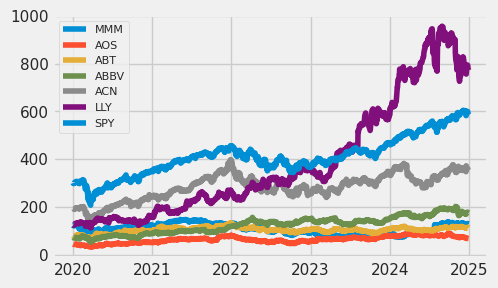

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [4]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.008648,-0.008831,-0.012266,-0.009538,-0.001667,-0.003334,-0.007601
2020-01-06 00:00:00-05:00,0.000952,0.006316,0.005226,0.007861,-0.006552,0.003711,0.003808
2020-01-07 00:00:00-05:00,-0.004039,-0.006738,-0.005575,-0.005721,-0.021827,0.001888,-0.002816
2020-01-08 00:00:00-05:00,0.015229,-0.001480,0.004068,0.007063,0.001960,0.009015,0.005315


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [5]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,0.084735,0.044532,0.029603,0.022298,0.039522,0.019445,0.034763
AOS,0.044532,0.090048,0.027495,0.019606,0.041046,0.020330,0.036544
ABT,0.029603,0.027495,0.067746,0.028886,0.039750,0.030728,0.033485
ABBV,0.022298,0.019606,0.028886,0.061874,0.026031,0.031754,0.024058
ACN,0.039522,0.041046,0.039750,0.026031,0.085552,0.029804,0.047499
LLY,0.019445,0.020330,0.030728,0.031754,0.029804,0.102445,0.028939
SPY,0.034763,0.036544,0.033485,0.024058,0.047499,0.028939,0.044097


### Correlation measures the **degree** to which two securities move in relation to each other.

In [6]:
corr_matrix =data.corr() * 250
corr_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,250.000000,127.451112,97.678348,76.986474,116.045116,52.176093,142.174944
AOS,127.451112,250.000000,88.006943,65.666310,116.912927,52.917311,144.982430
ABT,97.678348,88.006943,250.000000,111.538634,130.531684,92.211006,153.158757
ABBV,76.986474,65.666310,111.538634,250.000000,89.445971,99.711654,115.146258
ACN,116.045116,116.912927,130.531684,89.445971,250.000000,79.588183,193.334760
LLY,52.176093,52.917311,92.211006,99.711654,79.588183,250.000000,107.640255
SPY,142.174944,144.982430,153.158757,115.146258,193.334760,107.640255,250.000000


In [7]:
portfolio1 = data[['MMM','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,MMM,LLY
MMM,0.084735,0.019445
LLY,0.019445,0.102445


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [8]:
w = {'MMM': 0.1, 'LLY': 0.2, 'AOS': 0.2, 'ABT': 0.1, 'ABBV': 0.2, 'ACN': 0.05, 'SPY': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.03703093289736445)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [9]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-9-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
MMM,0.045164
AOS,0.144306
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [10]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.13862813718608796)

## Calculate the volatility, or the annualized standard deviation.

In [11]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MMM,0.291209
AOS,0.300199
ABT,0.260385
ABBV,0.248844
ACN,0.292609
LLY,0.320197
SPY,0.210075


In [12]:
data.std()*np.sqrt(250)

,0
MMM,0.291093
AOS,0.300080
ABT,0.260282
ABBV,0.248745
ACN,0.292493
LLY,0.320070
SPY,0.209992


## Create a table for returns and volatility of assets.

In [13]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MMM,0.045164,0.291209
AOS,0.144306,0.300199
ABT,0.041581,0.260385
ABBV,0.185137,0.248844
ACN,0.153931,0.292609
LLY,0.487153,0.320197
SPY,0.155179,0.210075


In [14]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [15]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [16]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [17]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MMM weight,AOS weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.148067,3.117132,0.179920,0.039435,0.177666,0.223537,0.221407,0.080947,0.077088
1,0.205763,3.159426,0.219854,0.010671,0.029323,0.115168,0.167625,0.225852,0.231508
2,0.190123,3.072777,0.044775,0.106620,0.241417,0.314128,0.063993,0.178096,0.050972
3,0.136609,3.110128,0.201092,0.161363,0.140823,0.232506,0.164351,0.043814,0.056051
4,0.139281,3.184233,0.125376,0.135447,0.303990,0.123084,0.214482,0.091818,0.005803


<Axes: xlabel='Volatility', ylabel='Returns'>

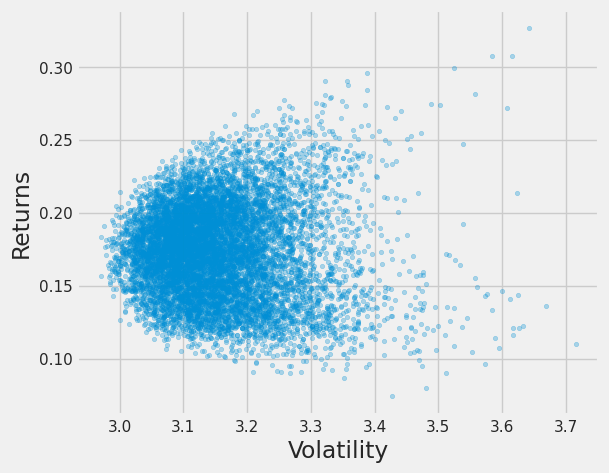

In [18]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])

In [ ]:
#Classwork/Homework-4/10/25

In [20]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [22]:
tickers = ['CBRE', 'COR', 'EXPD', 'XOM', 'FCX','HBAN','LOW']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2015-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,CBRE,COR,EXPD,XOM,FCX,HBAN,LOW
Date,,,,,,,
2015-01-02 00:00:00-05:00,34.669998,77.857185,39.047089,59.510216,20.967617,7.002213,56.358406
2015-01-05 00:00:00-05:00,33.919998,77.194458,37.834019,57.881924,19.721138,6.795480,55.009785
2015-01-06 00:00:00-05:00,33.660000,77.616188,37.403275,57.574203,20.059467,6.615427,55.134666
2015-01-07 00:00:00-05:00,34.009998,79.165421,37.412071,58.157593,20.353279,6.702120,56.774620
2015-01-08 00:00:00-05:00,34.750000,79.346161,38.431763,59.125607,20.807356,6.855500,57.973377
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,130.509995,227.127975,110.500000,105.357613,39.100948,16.110645,246.293854
2024-12-24 00:00:00-05:00,131.919998,227.028198,111.190002,105.456718,39.071064,16.288771,249.131470
2024-12-26 00:00:00-05:00,132.000000,226.080338,111.269997,105.545921,39.041176,16.348148,248.344894


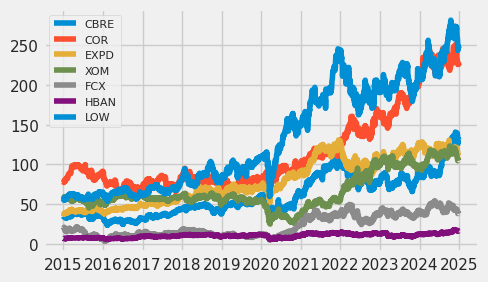

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [24]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,CBRE,COR,EXPD,XOM,FCX,HBAN,LOW
Date,,,,,,,
2015-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05 00:00:00-05:00,-0.021870,-0.008549,-0.031560,-0.027743,-0.061288,-0.029969,-0.024220
2015-01-06 00:00:00-05:00,-0.007695,0.005448,-0.011450,-0.005331,0.017010,-0.026853,0.002268
2015-01-07 00:00:00-05:00,0.010344,0.019764,0.000235,0.010082,0.014541,0.013020,0.029311
2015-01-08 00:00:00-05:00,0.021525,0.002280,0.026891,0.016508,0.022065,0.022627,0.020894


In [25]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,CBRE,COR,EXPD,XOM,FCX,HBAN,LOW
CBRE,0.106168,0.030086,0.034428,0.040666,0.077625,0.065381,0.048538
COR,0.030086,0.068780,0.016402,0.022341,0.034368,0.030469,0.023565
EXPD,0.034428,0.016402,0.054516,0.022919,0.046726,0.031315,0.032860
XOM,0.040666,0.022341,0.022919,0.076603,0.074046,0.048154,0.026874
FCX,0.077625,0.034368,0.046726,0.074046,0.293919,0.080098,0.056560
HBAN,0.065381,0.030469,0.031315,0.048154,0.080098,0.115191,0.039928
LOW,0.048538,0.023565,0.032860,0.026874,0.056560,0.039928,0.083358


In [26]:
corr_matrix =data.corr() * 250
corr_matrix

,CBRE,COR,EXPD,XOM,FCX,HBAN,LOW
CBRE,250.000000,88.017910,113.132418,112.731712,109.857999,147.802299,128.989639
COR,88.017910,250.000000,66.962079,76.946197,60.429495,85.576390,77.805458
EXPD,113.132418,66.962079,250.000000,88.666111,92.282538,98.792836,121.861715
XOM,112.731712,76.946197,88.666111,250.000000,123.368856,128.155967,84.077752
FCX,109.857999,60.429495,92.282538,123.368856,250.000000,108.827239,90.335941
HBAN,147.802299,85.576390,98.792836,128.155967,108.827239,250.000000,101.866288
LOW,128.989639,77.805458,121.861715,84.077752,90.335941,101.866288,250.000000


In [27]:
portfolio1 = data[['CBRE','COR']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,CBRE,COR
CBRE,0.106168,0.030086
COR,0.030086,0.068780


In [28]:
w = {'CBRE': 0.1, 'COR': 0.2, 'EXPD': 0.2, 'XOM': 0.1, 'FCX': 0.2, 'HBAN': 0.05, 'LOW': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.05336397671015379)

In [29]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-29-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
CBRE,0.201428
COR,0.124582
EXPD,0.135819
XOM,0.133463
FCX,0.311829
HBAN,0.103889
LOW,0.185699


In [30]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.18098427653090904)

In [31]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
CBRE,0.325899
COR,0.262312
EXPD,0.233534
XOM,0.276828
FCX,0.542251
HBAN,0.339466
LOW,0.288775


In [32]:
data.std()*np.sqrt(250)

,0
CBRE,0.325834
COR,0.262260
EXPD,0.233487
XOM,0.276773
FCX,0.542143
HBAN,0.339399
LOW,0.288718


In [33]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
CBRE,0.201428,0.325899
COR,0.124582,0.262312
EXPD,0.135819,0.233534
XOM,0.133463,0.276828
FCX,0.311829,0.542251
HBAN,0.103889,0.339466
LOW,0.185699,0.288775


In [34]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [35]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [36]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [37]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,CBRE weight,COR weight,EXPD weight,XOM weight,FCX weight,HBAN weight,LOW weight
0,0.191064,3.972105,0.102075,0.078007,0.264058,0.041100,0.248045,0.090954,0.175762
1,0.172329,3.554275,0.210540,0.164517,0.051975,0.227221,0.103088,0.063165,0.179493
2,0.159463,3.339336,0.124293,0.122951,0.176955,0.230238,0.068255,0.103064,0.174243
3,0.168434,3.585462,0.233637,0.248905,0.086517,0.137137,0.117704,0.111167,0.064934
4,0.165726,3.627365,0.198917,0.112986,0.099787,0.188797,0.099900,0.170612,0.129002


<Axes: xlabel='Volatility', ylabel='Returns'>

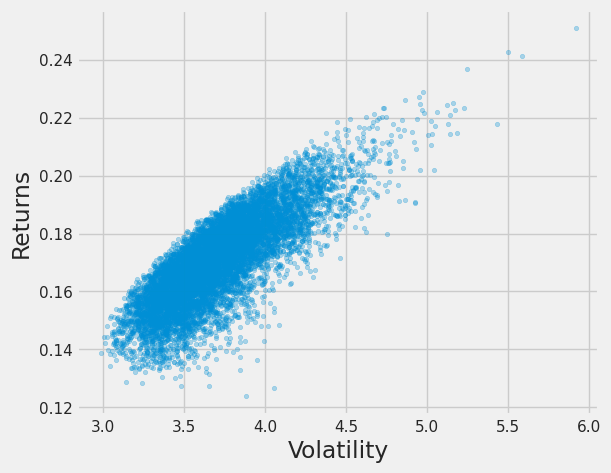

In [38]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])